In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
data = pd.read_csv("crocodile_dataset.csv")

data.head()

,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
0,1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.
1,2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operatio...
2,3,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas,Critically Endangered,Melissa Peterson,Democratic shake bill here grow gas enough ana...
3,4,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers,Least Concern,Edward Fuller,Officer relate animal direction eye bag do.
4,5,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers,Vulnerable,Donald Reid,Class great prove reduce raise author play mov...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Observation ID        1000 non-null   int64  
 1   Common Name           1000 non-null   object 
 2   Scientific Name       1000 non-null   object 
 3   Family                1000 non-null   object 
 4   Genus                 1000 non-null   object 
 5   Observed Length (m)   1000 non-null   float64
 6   Observed Weight (kg)  1000 non-null   float64
 7   Age Class             1000 non-null   object 
 8   Sex                   1000 non-null   object 
 9   Date of Observation   1000 non-null   object 
 10  Country/Region        1000 non-null   object 
 11  Habitat Type          1000 non-null   object 
 12  Conservation Status   1000 non-null   object 
 13  Observer Name         1000 non-null   object 
 14  Notes                 1000 non-null   object 
dtypes: float64(2), int64(1

In [ ]:
data.nunique()


Observation ID          1000
Common Name               18
Scientific Name           18
Family                     1
Genus                      3
Observed Length (m)      390
Observed Weight (kg)     837
Age Class                  4
Sex                        3
Date of Observation      936
Country/Region            47
Habitat Type              29
Conservation Status        5
Observer Name            989
Notes                   1000
dtype: int64

In [56]:
data["Common Name"].unique()

array(["Morelet's Crocodile", 'American Crocodile', 'Orinoco Crocodile',
       'Mugger Crocodile (Marsh Crocodile)', 'Siamese Crocodile',
       'Congo Dwarf Crocodile', 'West African Crocodile',
       'West African Dwarf Crocodile', 'Nile Crocodile',
       'Borneo Crocodile (disputed)', 'Saltwater Crocodile',
       'Cuban Crocodile', 'Philippine Crocodile', 'New Guinea Crocodile',
       'West African Slender-snouted Crocodile',
       "Freshwater Crocodile (Johnstone's)",
       'Central African Slender-snouted Crocodile',
       "Hall's New Guinea Crocodile"], dtype=object)

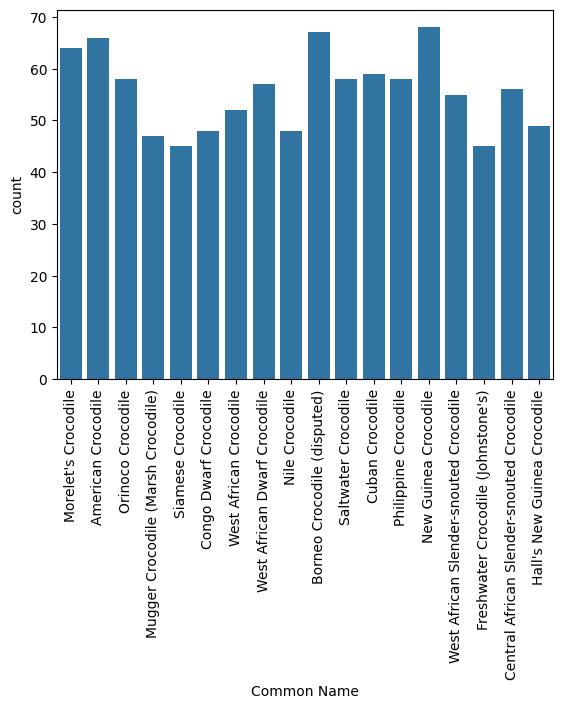

In [57]:
plt.figure()
sns.countplot(x="Common Name", data=data)
plt.xticks(rotation=90)
plt.show()

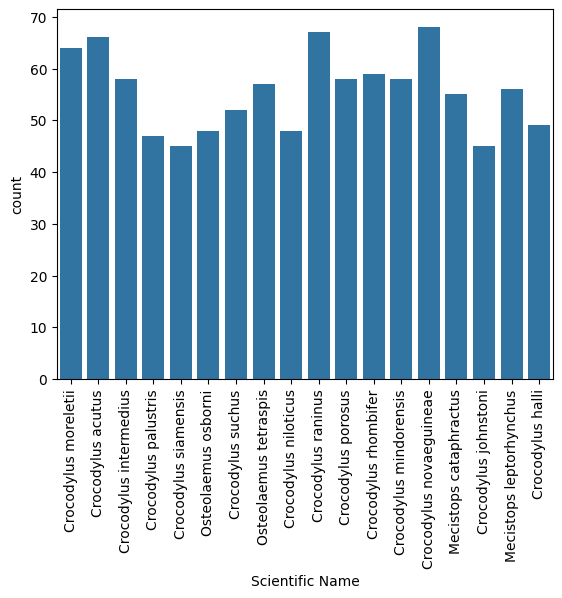

In [58]:
plt.figure()
sns.countplot(x="Scientific Name", data=data)
plt.xticks(rotation=90)
plt.show()

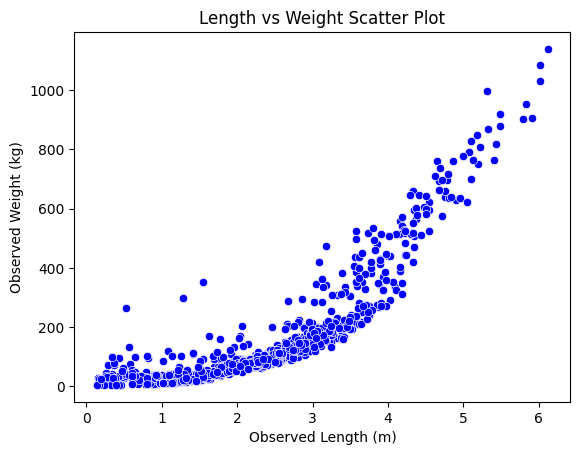

In [59]:
sns.scatterplot(x=data["Observed Length (m)"], y=data["Observed Weight (kg)"], color="blue")

plt.xlabel("Observed Length (m)")
plt.ylabel("Observed Weight (kg)")
plt.title("Length vs Weight Scatter Plot")
plt.show()

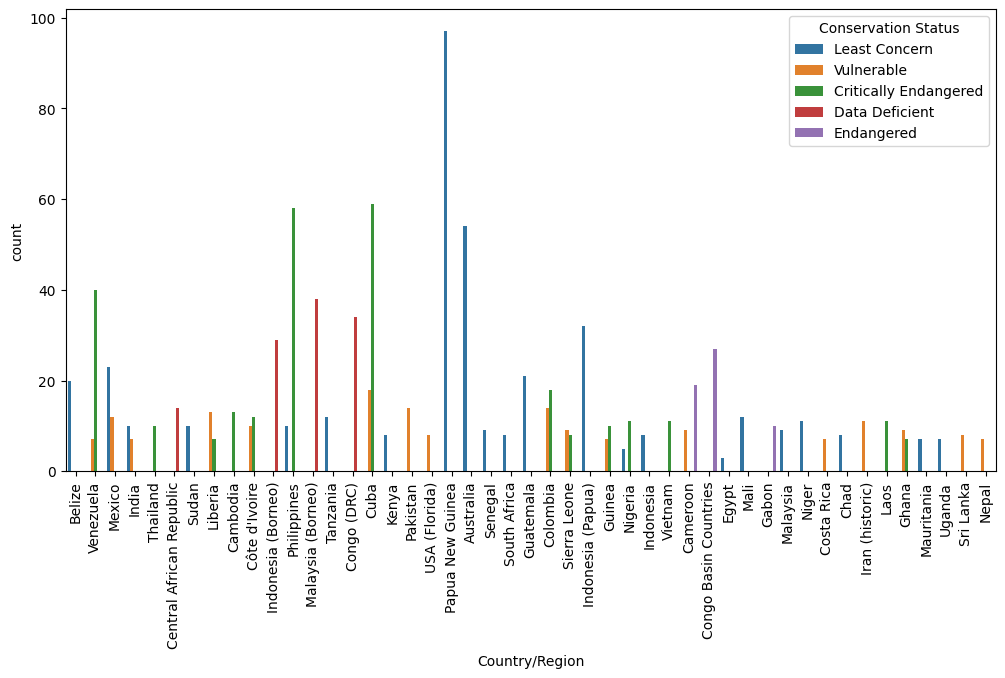

In [68]:
plt.figure(figsize=(12,6))
sns.countplot(x="Country/Region", hue="Conservation Status", data=data)
plt.xticks(rotation=90)
plt.show()

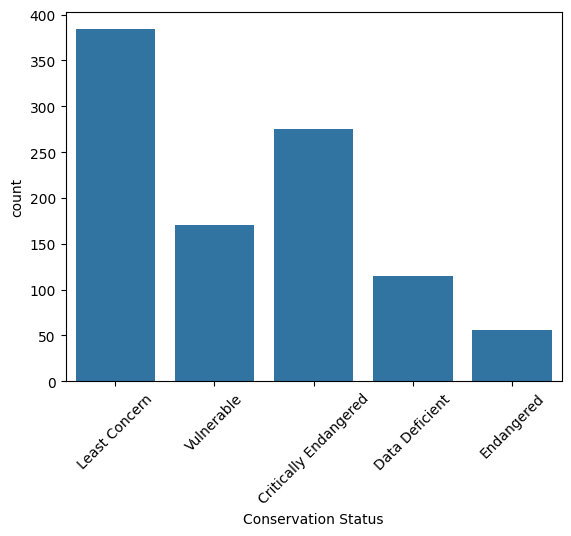

In [70]:
sns.countplot(data=data, x="Conservation Status")
plt.xticks(rotation=45)
plt.show()

In [3]:
data["Date of Observation"] = pd.to_datetime(
    data["Date of Observation"], 
    dayfirst=True,
    errors="coerce"
)
data["Year"] = data["Date of Observation"].dt.year
data["Month"] = data["Date of Observation"].dt.month
data["Day"] = data["Date of Observation"].dt.day

data = data.drop(columns=["Family", "Observation ID", "Date of Observation"])

data.info(), data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Common Name           1000 non-null   object 
 1   Scientific Name       1000 non-null   object 
 2   Genus                 1000 non-null   object 
 3   Observed Length (m)   1000 non-null   float64
 4   Observed Weight (kg)  1000 non-null   float64
 5   Age Class             1000 non-null   object 
 6   Sex                   1000 non-null   object 
 7   Country/Region        1000 non-null   object 
 8   Habitat Type          1000 non-null   object 
 9   Conservation Status   1000 non-null   object 
 10  Observer Name         1000 non-null   object 
 11  Notes                 1000 non-null   object 
 12  Year                  1000 non-null   int32  
 13  Month                 1000 non-null   int32  
 14  Day                   1000 non-null   int32  
dtypes: float64(2), int32(3

(None,
 Common Name               18
 Scientific Name           18
 Genus                      3
 Observed Length (m)      390
 Observed Weight (kg)     837
 Age Class                  4
 Sex                        3
 Country/Region            47
 Habitat Type              29
 Conservation Status        5
 Observer Name            989
 Notes                   1000
 Year                      21
 Month                     12
 Day                       31
 dtype: int64)

In [81]:
data["Notes"].head(10)

0             Cause bill scientist nation opportunity.
1    Ago current practice nation determine operatio...
2    Democratic shake bill here grow gas enough ana...
3          Officer relate animal direction eye bag do.
4    Class great prove reduce raise author play mov...
5    Source husband at tree note responsibility def...
6    Much section investment on gun young catch man...
7    Race Mr environment political born itself law ...
8    Medical blood personal success medical current...
9    Affect upon these story film around there wate...
Name: Notes, dtype: object

In [83]:
data["Observer Name"].head(20)

0              Allison Hill
1              Brandon Hall
2          Melissa Peterson
3             Edward Fuller
4               Donald Reid
5               Randy Brown
6     Dr. Marvin Thomas Jr.
7             Terri Frazier
8             Deborah Mason
9             Tamara George
10            Betty Alvarez
11          Jennifer Powers
12               Mark Perez
13           Timothy Duncan
14            Matthew Lucas
15            Donald Wright
16             Sarah Martin
17              Amy Edwards
18             Kurt Leonard
19       Matthew Cunningham
Name: Observer Name, dtype: object

In [4]:
data = data.drop(columns=["Notes", "Observer Name"])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Common Name           1000 non-null   object 
 1   Scientific Name       1000 non-null   object 
 2   Genus                 1000 non-null   object 
 3   Observed Length (m)   1000 non-null   float64
 4   Observed Weight (kg)  1000 non-null   float64
 5   Age Class             1000 non-null   object 
 6   Sex                   1000 non-null   object 
 7   Country/Region        1000 non-null   object 
 8   Habitat Type          1000 non-null   object 
 9   Conservation Status   1000 non-null   object 
 10  Year                  1000 non-null   int32  
 11  Month                 1000 non-null   int32  
 12  Day                   1000 non-null   int32  
dtypes: float64(2), int32(3), object(8)
memory usage: 90.0+ KB


In [86]:
data[["Scientific Name", "Common Name"]].head(20)

,Scientific Name,Common Name
0,Crocodylus moreletii,Morelet's Crocodile
1,Crocodylus acutus,American Crocodile
2,Crocodylus intermedius,Orinoco Crocodile
3,Crocodylus moreletii,Morelet's Crocodile
4,Crocodylus palustris,Mugger Crocodile (Marsh Crocodile)
5,Crocodylus palustris,Mugger Crocodile (Marsh Crocodile)
6,Crocodylus siamensis,Siamese Crocodile
7,Osteolaemus osborni,Congo Dwarf Crocodile
8,Crocodylus suchus,West African Crocodile
9,Crocodylus moreletii,Morelet's Crocodile


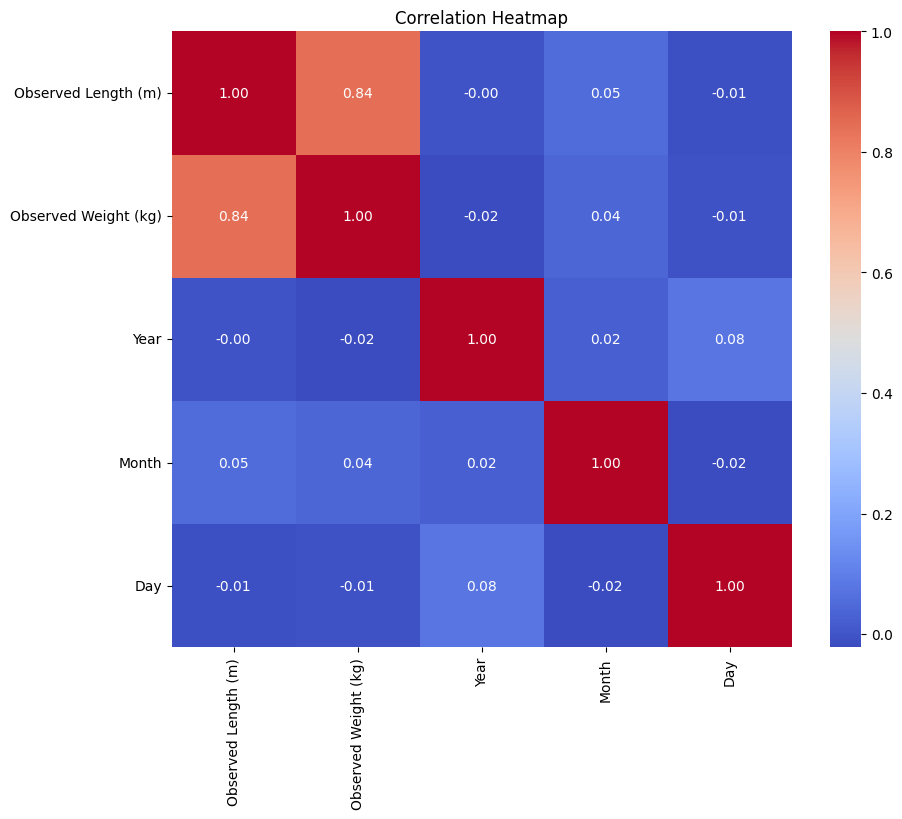

In [91]:
corr = data.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [5]:
data = data.drop(columns=["Common Name", "Year", "Month", "Day"])

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Scientific Name       1000 non-null   object 
 1   Genus                 1000 non-null   object 
 2   Observed Length (m)   1000 non-null   float64
 3   Observed Weight (kg)  1000 non-null   float64
 4   Age Class             1000 non-null   object 
 5   Sex                   1000 non-null   object 
 6   Country/Region        1000 non-null   object 
 7   Habitat Type          1000 non-null   object 
 8   Conservation Status   1000 non-null   object 
dtypes: float64(2), object(7)
memory usage: 70.4+ KB


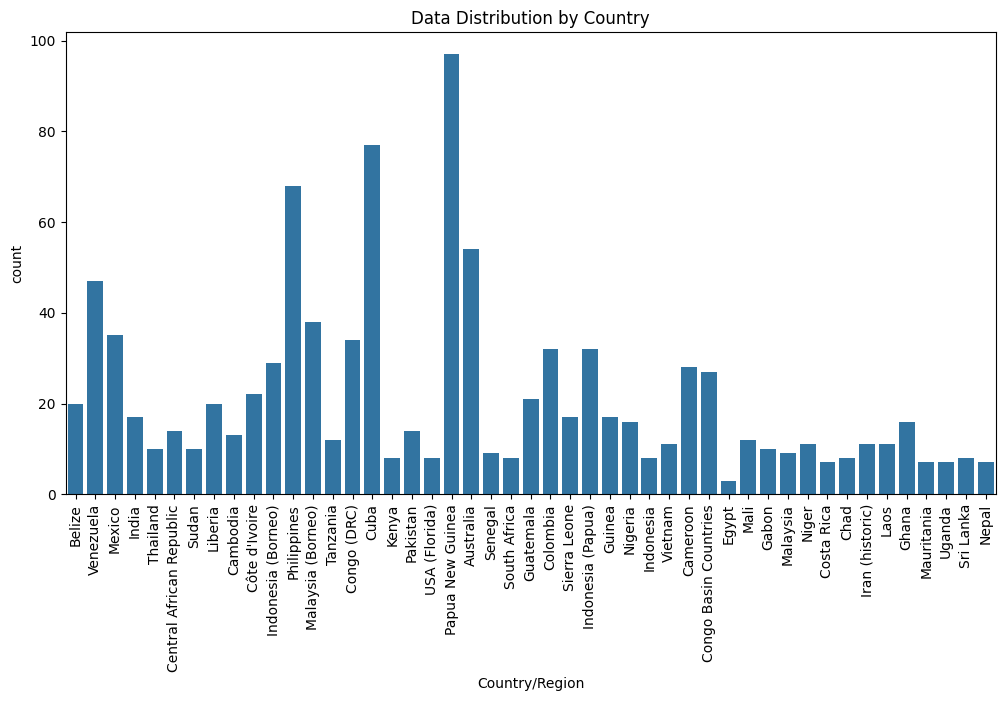

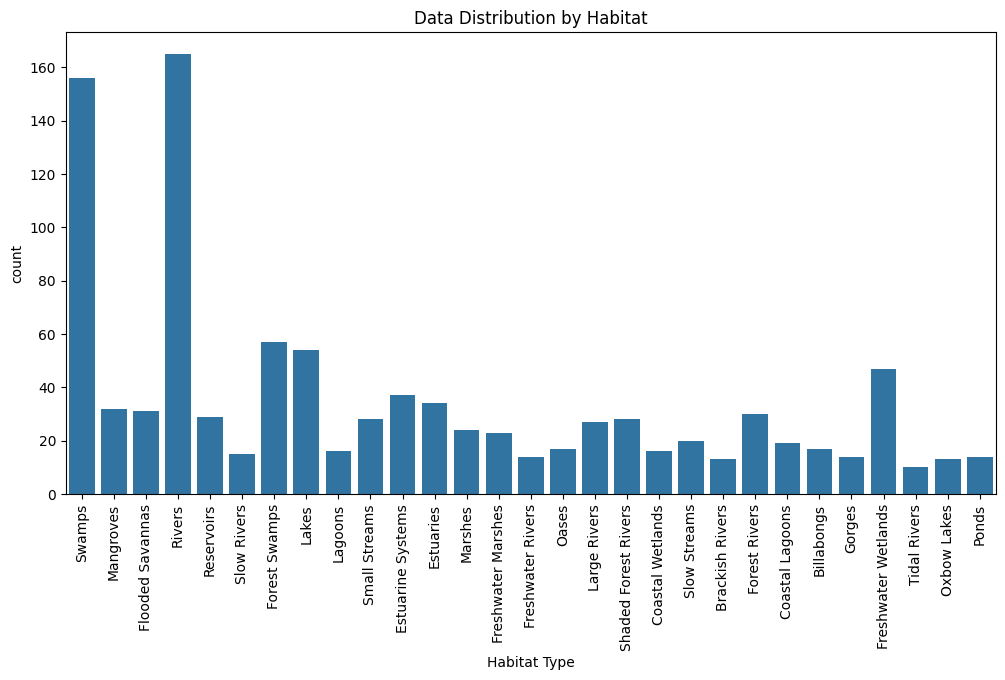

In [101]:
plt.figure(figsize=(12,6))
sns.countplot(x="Country/Region",  data=data)
plt.xticks(rotation=90)
plt.title("Data Distribution by Country")

plt.figure(figsize=(12,6))
sns.countplot(x="Habitat Type",  data=data)
plt.xticks(rotation=90)
plt.title("Data Distribution by Habitat")
plt.show()


In [6]:
data["Habitat Simple"] = data["Habitat Type"].apply(lambda x: x.split()[1] if len(x.split()) > 1 else x.split()[0])
print(data[["Habitat Type", "Habitat Simple"]])

             Habitat Type Habitat Simple
0                  Swamps         Swamps
1               Mangroves      Mangroves
2        Flooded Savannas       Savannas
3                  Rivers         Rivers
4                  Rivers         Rivers
..                    ...            ...
995                 Lakes          Lakes
996   Freshwater Wetlands       Wetlands
997                Swamps         Swamps
998  Shaded Forest Rivers         Forest
999   Freshwater Wetlands       Wetlands

[1000 rows x 2 columns]


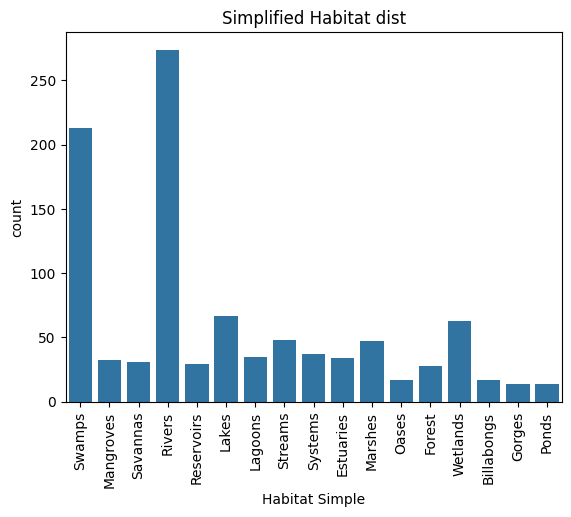

In [107]:
plt.figure()
sns.countplot(x="Habitat Simple",  data=data)
plt.xticks(rotation=90)
plt.title("Simplified Habitat dist")
plt.show()

In [7]:
data["Habitat Simple"] = data["Habitat Type"].apply(
    lambda x: "River" if "River" in x else ("Swamp" if "Swamp" in x else "Other")
)

data = data.drop(columns = ["Country/Region", "Habitat Type"])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Scientific Name       1000 non-null   object 
 1   Genus                 1000 non-null   object 
 2   Observed Length (m)   1000 non-null   float64
 3   Observed Weight (kg)  1000 non-null   float64
 4   Age Class             1000 non-null   object 
 5   Sex                   1000 non-null   object 
 6   Conservation Status   1000 non-null   object 
 7   Habitat Simple        1000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [109]:
data.nunique()

Scientific Name          18
Genus                     3
Observed Length (m)     390
Observed Weight (kg)    837
Age Class                 4
Sex                       3
Conservation Status       5
Habitat Simple            3
dtype: int64

In [8]:
categorical_cols = ["Scientific Name", "Genus", "Age Class", "Sex", 
                    "Habitat Simple"]

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print(data_encoded.head())


   Observed Length (m)  Observed Weight (kg)    Conservation Status  \
0                 1.90                  62.0          Least Concern   
1                 4.09                 334.5             Vulnerable   
2                 1.08                 118.2  Critically Endangered   
3                 2.42                  90.4          Least Concern   
4                 3.75                 269.4             Vulnerable   

   Scientific Name_Crocodylus halli  Scientific Name_Crocodylus intermedius  \
0                             False                                   False   
1                             False                                   False   
2                             False                                    True   
3                             False                                   False   
4                             False                                   False   

   Scientific Name_Crocodylus johnstoni  \
0                                 False   
1           

In [10]:
data_encoded.columns

Index(['Observed Length (m)', 'Observed Weight (kg)', 'Conservation Status',
       'Scientific Name_Crocodylus halli',
       'Scientific Name_Crocodylus intermedius',
       'Scientific Name_Crocodylus johnstoni',
       'Scientific Name_Crocodylus mindorensis',
       'Scientific Name_Crocodylus moreletii',
       'Scientific Name_Crocodylus niloticus',
       'Scientific Name_Crocodylus novaeguineae',
       'Scientific Name_Crocodylus palustris',
       'Scientific Name_Crocodylus porosus',
       'Scientific Name_Crocodylus raninus',
       'Scientific Name_Crocodylus rhombifer',
       'Scientific Name_Crocodylus siamensis',
       'Scientific Name_Crocodylus suchus',
       'Scientific Name_Mecistops cataphractus',
       'Scientific Name_Mecistops leptorhynchus',
       'Scientific Name_Osteolaemus osborni',
       'Scientific Name_Osteolaemus tetraspis', 'Genus_Mecistops',
       'Genus_Osteolaemus', 'Age Class_Hatchling', 'Age Class_Juvenile',
       'Age Class_Subadult', 'S

In [11]:
from sklearn.decomposition import PCA

In [12]:
X = data_encoded.drop(columns="Conservation Status")
y = data_encoded["Conservation Status"]

pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
models = {
    "Rf_clf" : RandomForestClassifier(random_state=42),
    "log_reg" : LogisticRegression(max_iter=1500),
    "k_neighbors" : KNeighborsClassifier()
}

In [14]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

for model, acc in results.items():
    print(f"{model} : {acc:.2f} %")

Rf_clf : 0.98 %
log_reg : 0.99 %
k_neighbors : 0.54 %


In [17]:
import joblib

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

model_columns = X.columns.tolist()  

with open('app/rf_model_pca.pkl', 'wb') as f:
    joblib.dump({"model": model, "columns": model_columns}, f)
